# Analysis and Visualization of Complex Agro-Environmental Data
---
## Parametric hypothesis testing

Most hypothesis testing functions in Python are provided by the stats submodule of SciPy. Other modules such as statsmodels and scikit have some advantages on the provided outputs and have additional relevant functions for hypothesis testing.

##### Import modules:

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##### Simulate populations (N = 100000)

In [4]:
# seed the random number generator
np.random.seed(24)
# generate univariate observations
pop1 = np.random.normal(50,20,100000)
pop2 = np.random.normal(70,25,100000)
pop3 = np.random.exponential(50, 100000)
pop4 = np.random.exponential(100, 100000)

### Parametric one-sample tests
#### One-sample t-test

1. Define H0 : The population mean is 40

2. Take a sample from population (pop1)

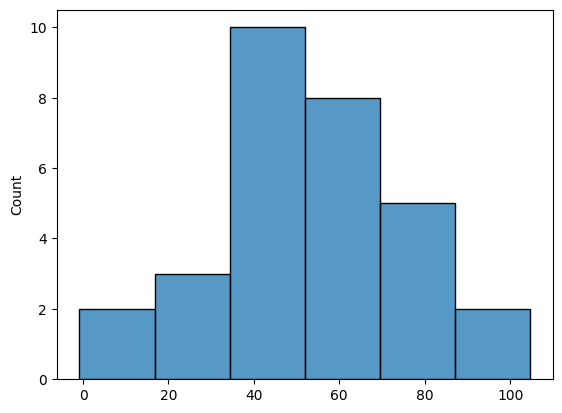

In [5]:
# Take random samples from pop1 (n=30)
import random
sample1 = random.sample(list(pop1), 30)
sns.histplot(sample1)
plt.show()

3. Point and interval estimation

In [6]:
# Point estimation (mean)
mean_sample1 = sum(sample1)/len(sample1)
print('mean_sample1=%.3f' % mean_sample1)

mean_sample1=53.912


In [7]:
# interval estimation
confint = sts.t.interval(confidence=0.95, df=len(sample1)-1, 
              loc=np.mean(sample1), 
              scale=sts.sem(sample1)) # compute standard error
print('lower=%.3f, upper=%.3f' % confint)

lower=45.378, upper=62.446


4. Compute the statistic and check *p-value*

In [8]:
# perform one sample t-test. 
# H0: The population mean is 40
stat, p = sts.ttest_1samp(a=sample1, popmean=40)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

t-stat=3.334, p-value=0.002


### Parametric two-sample tests
#### Two-sample *t* test (two-tailed) - two independent samples

##### 1. Define H0 : The samples are drawn from populations with equal means

##### 2. Take sample from populations (pop1 and pop2)

In [9]:
# Take random samples from pop1 and pop2 (n=30)
np.random.seed(123)
sample1 = random.sample(list(pop1), 30)
sample2 = random.sample(list(pop2), 30)

##### 3. Check assumptions: outliers, overal normality, homogeneity of variances

3.1 Presence of outliers

A quick way of checking if there are outliers is to visualize data with a boxplot, which automatically identifies outliers.

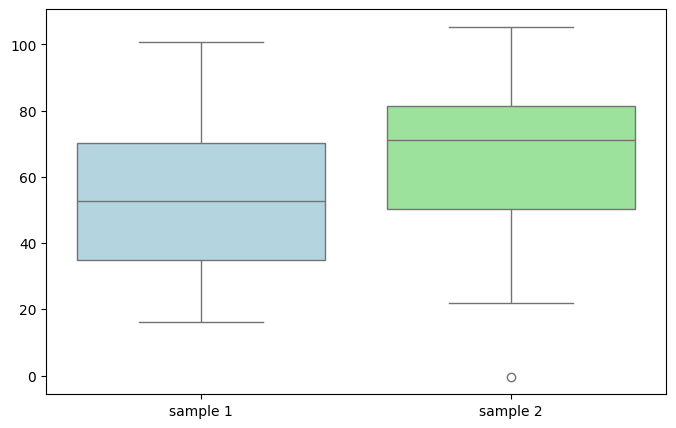

In [11]:
samplesDICT = {'sample 1': sample1, 'sample 2': sample2}
samplesDF = pd.DataFrame(samplesDICT)
plt.figure(figsize=(8, 5))
sns.boxplot(data=samplesDF, palette=["lightblue", "lightgreen"])
plt.show()

3.2 Check normality

The first step is to check if the distribution is approximately belly shaped and reasonably symetric.

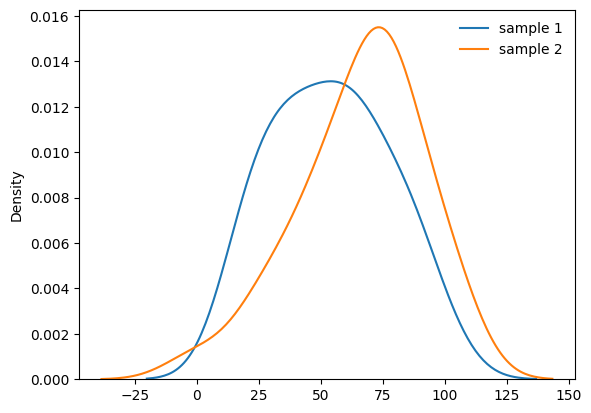

In [12]:
sns.kdeplot(sample1, label="sample 1")
sns.kdeplot(sample2, label="sample 2")
plt.legend(frameon=False)
plt.show()

3.3 Check homogeneity of variances

There are some ways of testing the null hypothesis that the sample variaces are equal. One of these tests is the `Levene test` (check [here](https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.stats.levene.html)), which is implemented in the `scypy` library.

In [13]:
stat, p = sts.levene(sample1, sample2, center='median')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 of equal variances has an error probability >0.05: H0 is not rejected')
else:
 print('reject H0 of equal variances has error probability <0.05: H0 is rejected)')

Statistics=0.045, p=0.832
fail to reject H0. Rejecting H0 of equal variances has an error probability >0.05: H0 is not rejected


##### 4. Compute the t-statistic and check *p-value*

In [14]:
# t-test - tests the null hypothesis that sample 1 and 2 are derived from populations with the same mean
stat, p = sts.ttest_ind(sample1, sample2)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=-1.882, p=0.065
fail to reject H0. Rejecting H0 has an error probability >0.05


#### Two-sample *t* test (one-tailed)

H0 : Population 1 has a mean > or = to Population 2

In [15]:
stat, p = sts.ttest_ind(sample1, sample2, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=-1.882, p=0.968
fail to reject H0. Rejecting H0 has an error probability >0.05


#### Paired two-sample *t* test (two-tailed)

Two samples are paired when the observations are not independent (for example when two measurements are taken in the same locations or from the same individuals)

H0 : The samples are drawn from populations with equal means

In [16]:
stat, p = sts.ttest_rel(sample1, sample2)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

t-stat=-2.373, p-value=0.024
reject H0 with an error probability <0.05)


### Parametric multiple sample tests
#### One-way ANOVA
1. Define H0 : The samples are drawn from populations with equal means
2. Take sample from populations pop1 - pop4

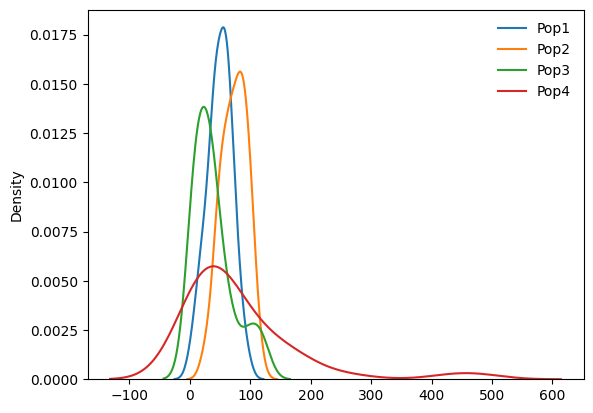

In [17]:
# Take random samples from data (n=20)
import random
sample1 = random.sample(list(pop1), 50)
sample2 = random.sample(list(pop2), 50)
sample3 = random.sample(list(pop3), 50)
sample4 = random.sample(list(pop4), 50)
sns.kdeplot(sample1, label='Pop1')
sns.kdeplot(sample2, label='Pop2')
sns.kdeplot(sample3, label='Pop3')
sns.kdeplot(sample4, label='Pop4')
plt.legend(frameon=False, loc='upper right')
plt.show()

3. Compute the statistic and check the *p-value*

In [18]:
stat, p = sts.f_oneway(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

F-statistics=7.008, p=0.000168
reject H0 with an error probability <0.05)


The SciPy does not provide the usual ANOVA table. An alternative is to use the statsmodel api that includes a more complete output:

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# the statsmodels ANOVA needs to convert data into a DataFrame
list_sample = [sample1, sample2, sample2, sample4]
df = pd.DataFrame(list_sample)
df = df.T
df.columns = ["sample1", "sample2", "sample3", "sample4"]
df = df.stack()
df=df.reset_index()
df.rename(columns = {'level_1':'group', 0:'value'}, inplace = True)
df.drop('level_0', inplace=True, axis=1)
df

,group,value
0,sample1,10.079958
1,sample2,49.666315
2,sample3,49.666315
3,sample4,67.593359
4,sample1,32.321103
...,...,...
195,sample4,15.261500
196,sample1,58.820564
197,sample2,72.211015
198,sample3,72.211015


In [20]:
mod = ols('value ~ group',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2) # typ is the type of anova to perform ('I','II' or 'III' = 1,2,3) - type 2 does not consider interactions, which is the case.
print(aov_table) # provides the usual ANOVA table

                 sum_sq     df         F    PR(>F)
group      28728.529854    3.0  3.521127  0.016073
Residual  533048.209969  196.0       NaN       NaN


#### Two-way ANOVA

Tests whether two factors affect the mean of three or more groups. It also tests whether there is an interaction between the two factors (if one factor changes the effect of the other factor).

Possible H0: 
1. There is no difference in the means of factor A.
2. There is no difference in means of factor B.
3. There is no interaction between factors A and B.

In [21]:
# create data (example taken from https://www.statology.org/two-way-anova-python/) - influence of plant growth by sunlight exposure and watering frequency
df2 = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
print(df2)

     water   sun  height
0    daily   low       6
1    daily   low       6
2    daily   low       6
3    daily   low       5
4    daily   low       6
5    daily   med       5
6    daily   med       5
7    daily   med       6
8    daily   med       4
9    daily   med       5
10   daily  high       6
11   daily  high       6
12   daily  high       7
13   daily  high       8
14   daily  high       7
15  weekly   low       3
16  weekly   low       4
17  weekly   low       4
18  weekly   low       4
19  weekly   low       5
20  weekly   med       4
21  weekly   med       4
22  weekly   med       4
23  weekly   med       4
24  weekly   med       4
25  weekly  high       5
26  weekly  high       6
27  weekly  high       6
28  weekly  high       7
29  weekly  high       8


In [22]:
#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


#### Repeated measures ANOVA

Used when the responses from the same subjects (experimental units) are measured repeatedly over a period of time or under different experimental conditions.

H0: Treatment or time groups means are equal

In [23]:
#create data - Ex: Measurements (time of response to stressor) taken over time for the same fish individuals
df3 = pd.DataFrame({'fish': np.repeat([1, 2, 3, 4, 5], 4),
                   'time': np.tile([1, 2, 3, 4], 5),
                   'time of response': [30, 28, 16, 34,
                                14, 18, 10, 22,
                                24, 20, 18, 30,
                                38, 34, 20, 44, 
                                26, 28, 14, 30]})
df3

,fish,time,time of response
0,1,1,30
1,1,2,28
2,1,3,16
3,1,4,34
4,2,1,14
5,2,2,18
6,2,3,10
7,2,4,22
8,3,1,24
9,3,2,20


In [24]:
rmanova = stm.anova.AnovaRM(data=df3, depvar='time of response', subject='fish', within=['time']).fit()
print(rmanova)

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time 24.7589 3.0000 12.0000 0.0000



### Post-hoc or multiple comparison tests

#### Tukey's test

To check which pairs of groups differ in their mean values. Can be used also as a stand alone test.
Implemented in statsmodels.stats.multicomp

In [25]:
# perform Tukey's test using the df dataframe defined above)
tukey = stm.multicomp.pairwise_tukeyhsd(endog=df['value'],
                          groups=df['group'],
                          alpha=0.05)
#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
sample1 sample2  23.9783 0.1018   -3.048 51.0047  False
sample1 sample3  23.9783 0.1018   -3.048 51.0047  False
sample1 sample4  31.9548 0.0132   4.9285 58.9812   True
sample2 sample3      0.0    1.0 -27.0263 27.0263  False
sample2 sample4   7.9765 0.8702 -19.0498 35.0029  False
sample3 sample4   7.9765 0.8702 -19.0498 35.0029  False
-------------------------------------------------------


# Exercise 5

## Question 1
#### Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.

In [3]:
# Read in data
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


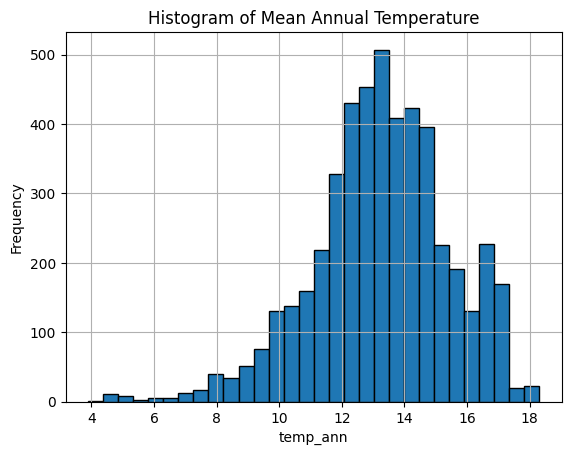

In [13]:
plt.hist(df['temp_ann'], bins=30, edgecolor='black')
plt.title('Histogram of Mean Annual Temperature')
plt.xlabel('temp_ann')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# Remove na values
df = df[df['temp_ann'].notna()]

In [9]:
df['temp_ann_z'] = stats.zscore(df['temp_ann'])

In [10]:
# Calculate mean and standard deviation
mean_z = df['temp_ann_z'].mean()
std_z = df['temp_ann_z'].std()
print("Mean (Z):", mean_z)
print("Standard Deviation (Z):", std_z)

Mean (Z): 7.04524918745813e-17
Standard Deviation (Z): 1.0001033004496327


In [11]:
conf_interval = (mean_z - 1.96 * std_z / np.sqrt(len(df)),
                 mean_z + 1.96 * std_z / np.sqrt(len(df)))
print("95% Confidence Interval (Z):", conf_interval)

95% Confidence Interval (Z): (np.float64(-0.028173019154227315), np.float64(0.028173019154227454))


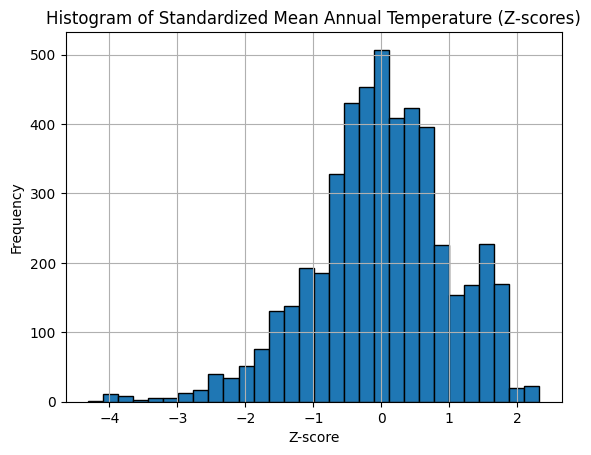

In [12]:
plt.hist(df['temp_ann_z'], bins=30, edgecolor='black')
plt.title('Histogram of Standardized Mean Annual Temperature (Z-scores)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Question 2
#### Test whether the means (or medians) of“Mean Annual Temperature” between presence and absencesites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Use both standardized and non-standardized values and compare results. Please state which is/are the null hypothesis of your test(s).

In [14]:
# Separate data
present = df[df['Salmo trutta fario'] == 1]['temp_ann'].dropna()
absent = df[df['Salmo trutta fario'] == 0]['temp_ann'].dropna()

In [17]:
# Normality test
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
print("Present sites:", shapiro(present))
print("Absent sites:", shapiro(absent))

Present sites: ShapiroResult(statistic=np.float64(0.9442349290382075), pvalue=np.float64(5.569994259791108e-32))
Absent sites: ShapiroResult(statistic=np.float64(0.9740450645174886), pvalue=np.float64(4.6440721755782766e-18))


#### pvalue is tiny - assume data isn't normally distributed
Use non-parametric tests

In [18]:
mw_result = mannwhitneyu(present, absent, alternative='two-sided')
print("Mann-Whitney U test (non-standardized):", mw_result)

Mann-Whitney U test (non-standardized): MannwhitneyuResult(statistic=np.float64(1027812.5), pvalue=np.float64(7.105075261935897e-303))


## pvalue is tiny again - reject null hypothesis
The results suggest that temperature has a strong effect on salmo presence across catchments. 

## Question 3
#### Test whether there are diferences in the mean elevation in the upstream catchment(Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

Null hypothesis: the mean elevation is the same across all eight most sampled catchments.  
Alternate hypothesis: at least one catchment has a mean elevation that is significantly different from the others.

In [24]:
# Appropriate test is one-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [25]:
# Get the 8 most sampled catchments
top8 = df['Catchment_name'].value_counts().nlargest(8).index
df_top8 = df[df['Catchment_name'].isin(top8)]

In [26]:
# ANOVA
model = ols('Elevation_mean_catch ~ C(Catchment_name)', data=df_top8).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                         sum_sq      df           F         PR(>F)
C(Catchment_name)  2.137395e+08     7.0  227.953983  1.369526e-285
Residual           5.315097e+08  3968.0         NaN            NaN


If PR(>F) is < 0.05, there's a significant difference in means among catchments and we reject the null hypothesis.  
So in this case, the PR(>F) is quite tiny, meaning that we **reject the null hypothesis**

In [28]:
# Tukey's HSD 
tukey = pairwise_tukeyhsd(endog=df_top8['Elevation_mean_catch'],
                          groups=df_top8['Catchment_name'],
                          alpha=0.05)
print("\nTukey HSD Results:")
print(tukey)


Tukey HSD Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica       Catala   50.1883 0.7208  -42.1585  142.5351  False
  Cantabrica        Douro  268.1584    0.0  190.9443  345.3726   True
  Cantabrica         Ebro  467.4299    0.0   399.797  535.0628   True
  Cantabrica Galiza-Norte -184.2794    0.0   -252.02 -116.5388   True
  Cantabrica       Guadia -168.8947    0.0 -251.7428  -86.0466   True
  Cantabrica        Minho  290.9895    0.0  223.2126  358.7663   True
  Cantabrica         Tejo  168.3227    0.0    95.179  241.4664   True
      Catala        Douro  217.9701    0.0  124.2303  311.7099   True
      Catala         Ebro  417.2415    0.0  331.2221  503.2609   True
      Catala Galiza-Norte -234.4677    0.0 -320.5718 -148.3636   True
      Catala       Guadia -219.0831    0.0 -317.5154 -120.6507   True


Where reject = true, the mean elevation between these two differs significantly

# Question 4
#### Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

Having NaN values in the data.    
Not having equal amounts of data from all of the catchment sites could have an effect on these tests.  
Non-normal distribution of data.